In [1]:
import numpy as np
import matplotlib as plt
from hilp import load_csv_data
from helper import *
from costs import *
from least_squares import *
from ridge_regression import *
from logistic_regression import *

In [2]:
yb, input_data, ids = load_csv_data('data/train.csv')

In [3]:
input_data.shape

(250000, 30)

In [4]:
cleaned_columns = [c for c in input_data.T if (c==-999).sum()/len(c) < 0.2]
print(np.shape(cleaned_columns))
for c in cleaned_columns:
    numb_of_nan = (c==-999).sum()
    median = np.median(list(filter(lambda x : x!= -999, c)))
    c[c == -999] = median

(20, 250000)


In [5]:
def create_cor_matrix(cleaned_columns):
    cor_matrix = np.corrcoef(cleaned_columns)
    upper_tri = np.triu(cor_matrix)
    for i in range(upper_tri.shape[0]):
        upper_tri[i][i]= 0
    return list(zip(*np.where(upper_tri > 0.6)))

In [6]:
zipped = create_cor_matrix(cleaned_columns)
print(zipped)

[(0, 2), (3, 6), (3, 15), (3, 17), (3, 18), (3, 19), (6, 17), (6, 18), (6, 19), (7, 12), (17, 18), (17, 19), (18, 19)]


In [7]:
def count(zipped):
    c = [item for z in zipped for item in z]
    return [(x,c.count(x)) for x in set(c)]

In [8]:
count(zipped)

[(0, 1),
 (2, 1),
 (3, 5),
 (6, 4),
 (7, 1),
 (12, 1),
 (15, 1),
 (17, 4),
 (18, 4),
 (19, 4)]

In [9]:
zipped = create_cor_matrix(cleaned_columns)
while len(zipped) > 0 :
    biggest = (-1,-1)
    cnt = count(zipped)
    print(cnt)
    for c in cnt:
        if c[1] > biggest[1]:
            biggest = c
    del cleaned_columns[biggest[0]]
    print(np.shape(cleaned_columns))
    zipped = create_cor_matrix(cleaned_columns)

[(0, 1), (2, 1), (3, 5), (6, 4), (7, 1), (12, 1), (15, 1), (17, 4), (18, 4), (19, 4)]
(19, 250000)
[(0, 1), (2, 1), (5, 3), (6, 1), (11, 1), (16, 3), (17, 3), (18, 3)]
(18, 250000)
[(0, 1), (2, 1), (5, 1), (10, 1), (15, 2), (16, 2), (17, 2)]
(17, 250000)
[(0, 1), (2, 1), (5, 1), (10, 1), (15, 1), (16, 1)]
(16, 250000)
[(9, 1), (4, 1), (14, 1), (15, 1)]
(15, 250000)
[(13, 1), (14, 1)]
(14, 250000)


In [10]:
cleaned_columns

[array([ 51.655,  68.768, 162.172, ...,  60.526,  19.362,  72.756]),
 array([ 97.827, 103.235, 125.953, ...,  75.839,  68.812,  70.831]),
 array([3.064, 3.473, 3.148, ..., 2.39 , 3.365, 2.025]),
 array([41.928,  2.078,  9.336, ..., 22.183, 13.504,  7.479]),
 array([1.582, 0.879, 3.776, ..., 1.202, 0.999, 0.936]),
 array([ 1.396,  1.414,  1.414, ...,  0.529,  1.414, -1.411]),
 array([32.638, 42.014, 32.154, ..., 35.636, 27.944, 43.003]),
 array([ 1.017,  2.039, -0.705, ..., -0.266, -2.211,  1.685]),
 array([ 0.381, -3.011, -2.093, ..., -3.132,  2.792,  2.653]),
 array([ 2.273,  0.501, -0.953, ...,  0.381, -0.874,  1.49 ]),
 array([-2.414,  0.103,  1.052, ...,  0.851, -0.296,  0.637]),
 array([16.824, 44.704, 54.283, ..., 23.419, 12.15 , 40.729]),
 array([-0.277, -1.916, -2.186, ..., -2.89 ,  0.811, -1.596]),
 array([113.497,  46.226,  44.251, ...,  41.992,   0.   ,   0.   ])]

In [11]:

batch_size = 1
max_iters = 20
#gamma = 0.01
lambda_ = 0.01

In [12]:
gammas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03]

In [13]:
# standardize the data
std_data, mean, std = standardize(np.transpose(cleaned_columns))

In [14]:
# build the model (add 1's for the w0)
tx, y = build_model_data(std_data, yb)

In [15]:
print(tx.shape)

(250000, 15)


In [16]:
initial_w = np.random.randint(0,1,tx.shape[1])

In [17]:
l = []
W = []
for gamma in gammas:
    loss, ws = gradient_descent(y, tx, initial_w, max_iters, gamma)
    l.append(loss[max_iters-1])
    W.append(ws)
best_loss = min(l)
ind = l.index(best_loss)
print("best loss :" + str(best_loss)+ " " + str(gammas[ind]) +" \n "+ str(W[ind]))

best loss :0.4102946358406707 0.03 
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([-0.00943992, -0.0142345 , -0.01340085,  0.00429327,  0.00042798,
        0.00438301,  0.00505114, -0.00019993,  0.00480973,  0.00480458,
        0.00481364,  0.00480349, -0.00386406,  0.00481928, -0.0025177 ]), array([-0.01705761, -0.02697734, -0.02387843,  0.00776124,  0.00077771,
        0.00790227,  0.00916615,  0.00038294,  0.00869072,  0.00868049,
        0.00869814,  0.00868043, -0.00672639,  0.00870953, -0.0025858 ]), array([-0.02327676, -0.03851454, -0.03209573,  0.01059701,  0.00104006,
        0.01075882,  0.01256048,  0.00153645,  0.01185887,  0.01184363,
        0.01186948,  0.01184627, -0.00886963,  0.01188667, -0.00109857]), array([-0.02841185, -0.04906381, -0.03854863,  0.0129437 ,  0.0012123 ,
        0.0131019 ,  0.01539431,  0.00310607,  0.01447446,  0.01445424,
        0.01448798,  0.01446091, -0.01049583,  0.01451099,  0.00132395]), array([-0.03269769, -0.05879248, -0.

In [18]:
stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma)

SGD iter. 0/19: loss=0.5, w0=-0.03, w1=-0.003439243745959906
SGD iter. 1/19: loss=0.6916112966866318, w0=-0.01388823104253905, w1=0.016107397827442926
SGD iter. 2/19: loss=0.5722128103215048, w0=-0.04142658318517578, w1=0.0048600371735382005
SGD iter. 3/19: loss=0.575439960667436, w0=-0.06967138459664661, w1=-0.03872791155018346
SGD iter. 4/19: loss=0.5677678491412996, w0=-0.08248589101635659, w1=-0.039506532730828436
SGD iter. 5/19: loss=0.6151805399337169, w0=-0.10137557740767858, w1=-0.060393017259044654
SGD iter. 6/19: loss=0.6394415145678716, w0=-0.05627904844227543, w1=-0.06017296272804628
SGD iter. 7/19: loss=0.5433429402443171, w0=-0.07232557806078263, w1=-0.10038328649878711
SGD iter. 8/19: loss=0.5729832092947474, w0=-0.09488016890765699, w1=-0.12248439614764542
SGD iter. 9/19: loss=0.5825884692035913, w0=-0.11119466594266762, w1=-0.12841208539733345
SGD iter. 10/19: loss=0.6178546743132465, w0=-0.12736460925828047, w1=-0.1278217550546918
SGD iter. 11/19: loss=0.6557219544595

([0.5,
  0.6916112966866318,
  0.5722128103215048,
  0.575439960667436,
  0.5677678491412996,
  0.6151805399337169,
  0.6394415145678716,
  0.5433429402443171,
  0.5729832092947474,
  0.5825884692035913,
  0.6178546743132465,
  0.6557219544595156,
  0.6529635155664624,
  0.6905022746175076,
  0.620323806624854,
  0.4549956775615262,
  0.48606102802792794,
  0.459743001954328,
  0.4416901770423679,
  0.44030584163305353],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([-0.03      , -0.00343924, -0.03307982,  0.01370412, -0.03467809,
          0.01422687,  0.01551107, -0.00591412,  0.01540778,  0.01326861,
          0.01576861,  0.01480267, -0.01665812,  0.01521724, -0.24459793]),
  array([-0.01388823,  0.0161074 ,  0.00887765,  0.00630072, -0.01990681,
          0.00623536,  0.00783479,  0.02244595,  0.00720486,  0.00460802,
          0.00734979,  0.00691499,  0.01242837,  0.00694011, -0.15992536]),
  array([-0.04142658,  0.00486004, -0.02658238,  0.01869007, -0.0247737

In [19]:
least_squares(y, tx)

(array([ 8.66118554e+00, -2.95913431e-01, -1.55696769e-01,  1.14665273e+01,
        -9.24041089e-02,  1.73985503e+00,  5.46073480e+00,  5.05953417e-01,
        -5.36135529e-02, -4.52883740e-02, -2.25491467e-02,  6.39436180e-02,
         1.10902891e-01,  2.83210180e-02, -8.71413825e-03]),
 0.3618715059145637)

In [20]:
ridge_regression(y, tx, lambda_)

array([-0.0457318 , -0.38202771,  0.00314948,  0.08489342, -0.06678534,
        0.02032215,  0.16170491,  0.30677166,  0.02052219,  0.01365758,
        0.02129657,  0.02832645,  0.08322013,  0.02449215, -0.00512261])

In [21]:
logistic_regression(y, tx, initial_w, max_iters, gamma)

Logistic regression iter. 0/19: loss=-56041.702994546125, w0=-0.048879839999999994, w1=-0.04755510726648875
Logistic regression iter. 1/19: loss=-44798.01377800366, w0=-0.09281692326741553, w1=-0.09156863242929458
Logistic regression iter. 2/19: loss=-36520.81082907068, w0=-0.132697623551622, w1=-0.13270039360130947
Logistic regression iter. 3/19: loss=-30255.61682132148, w0=-0.16931491623036557, w1=-0.17155402285992088
Logistic regression iter. 4/19: loss=-25393.913529090874, w0=-0.20329986427503297, w1=-0.2086076429490077
Logistic regression iter. 5/19: loss=-21541.274949214887, w0=-0.23514141106340436, w1=-0.24422758107971837
Logistic regression iter. 6/19: loss=-18434.304592455504, w0=-0.2652187645665376, w1=-0.2786940842960311
Logistic regression iter. 7/19: loss=-15891.663869139407, w0=-0.2938288999907942, w1=-0.3122233511171426
Logistic regression iter. 8/19: loss=-13784.973282222532, w0=-0.32120722904808796, w1=-0.34498405749582206
Logistic regression iter. 9/19: loss=-12021.06

([-56041.702994546125,
  -44798.01377800366,
  -36520.81082907068,
  -30255.61682132148,
  -25393.913529090874,
  -21541.274949214887,
  -18434.304592455504,
  -15891.663869139407,
  -13784.973282222532,
  -12021.064698412118,
  -10530.831250929969,
  -9262.01818440699,
  -8174.436557690547,
  -7236.708174602415,
  -6424.003267452614,
  -5716.437010595743,
  -5097.912639604218,
  -4555.273217995794,
  -4077.6704979301335,
  -3656.088956019979],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([-0.04887984, -0.04755511, -0.06818135,  0.02221032,  0.00293296,
          0.02304273,  0.02547189, -0.01213505,  0.02490718,  0.02489492,
          0.02492095,  0.02485664, -0.02156397,  0.02492568, -0.04074964]),
  array([-0.09281692, -0.09156863, -0.12865086,  0.04217322,  0.00582502,
          0.04374011,  0.04842057, -0.02195266,  0.04729528,  0.04727107,
          0.047322  ,  0.04720003, -0.04010691,  0.04733197, -0.0726702 ]),
  array([-0.13269762, -0.13270039, -0.1829571 ,

In [22]:
reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)

Reg Logistic regression iter. 0/19: loss=-56041.7029945458, w0=-0.048879839999999994, w1=-0.04755510726648875
Reg Logistic regression iter. 1/19: loss=-44798.01379172827, w0=-0.09281692320875973, w1=-0.09156863237222845
Reg Logistic regression iter. 2/19: loss=-36520.81086063573, w0=-0.13269762338684649, w1=-0.13270039343798662
Reg Logistic regression iter. 3/19: loss=-30255.61687079597, w0=-0.16931491591939243, w1=-0.17155402254613336
Reg Logistic regression iter. 4/19: loss=-25393.913594963247, w0=-0.20329986378248371, w1=-0.20860764244353192
Reg Logistic regression iter. 5/19: loss=-21541.275029433906, w0=-0.23514141035691669, w1=-0.2442275803431143
Reg Logistic regression iter. 6/19: loss=-18434.30468487377, w0=-0.2652187636157164, w1=-0.2786940832899314
Reg Logistic regression iter. 7/19: loss=-15891.663971700817, w0=-0.2938288987665459, w1=-0.3122233498038285
Reg Logistic regression iter. 8/19: loss=-13784.973393036584, w0=-0.3212072275221884, w1=-0.3449840558379675
Reg Logistic 

([-56041.7029945458,
  -44798.01379172827,
  -36520.81086063573,
  -30255.61687079597,
  -25393.913594963247,
  -21541.275029433906,
  -18434.30468487377,
  -15891.663971700817,
  -13784.973393036584,
  -12021.064815776801,
  -10530.83137333155,
  -9262.018310509662,
  -8174.436686322218,
  -7236.708304739526,
  -6424.003398205351,
  -5716.43714119423,
  -5097.91276938586,
  -4555.273346393789,
  -4077.6706244631255,
  -3656.0890802827516],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([-0.04887984, -0.04755511, -0.06818135,  0.02221032,  0.00293296,
          0.02304273,  0.02547189, -0.01213505,  0.02490718,  0.02489492,
          0.02492095,  0.02485664, -0.02156397,  0.02492568, -0.04074964]),
  array([-0.09281692, -0.09156863, -0.12865086,  0.04217322,  0.00582502,
          0.04374011,  0.04842057, -0.02195266,  0.04729528,  0.04727107,
          0.047322  ,  0.04720003, -0.04010691,  0.04733197, -0.0726702 ]),
  array([-0.13269762, -0.13270039, -0.1829571 ,  0.

In [23]:
from cross_validation import * 
degree = 3
k_fold = 4
lambdas = np.logspace(-10,0,8)
degrees = [3,5,7]
seed = 1
k_indices = build_k_indices(y, k_fold, seed)


In [24]:
initial_w = np.random.randint(0,1,len(tx.T))
max_iters = 30
gammas = np.arange(0.005,0.5,0.01)

In [25]:
print(initial_w.shape)

(15,)


For polynomial expansion up to degree, the choice of gamma which leads to the best rmse is 0.20500 with a test rmse of 0.869


(0.20499999999999996, 0.8694234727131173)

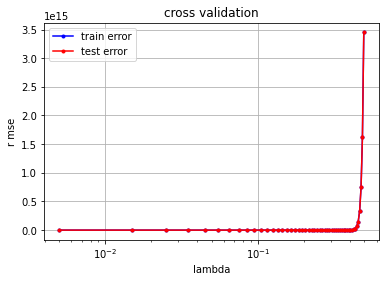

In [26]:
cross_validation_gradient_descent(y, tx, k_fold, initial_w=initial_w, max_iters = max_iters, gammas = gammas)

In [ ]:
cross_validation_stochastic_gradient_descent(y, tx, k_fold, initial_w=initial_w, max_iters = max_iters, gammas = gammas, batch_size = 2)

SGD iter. 0/29: loss=0.5, w0=-0.005, w1=-0.0029748579001222415
SGD iter. 1/29: loss=0.492469795660719, w0=-0.009917161490939004, w1=-0.006758472343982556
SGD iter. 2/29: loss=0.4837312774999328, w0=-0.014657886792715846, w1=-0.012398970212417152
SGD iter. 3/29: loss=0.4751436475784678, w0=-0.009189726916300218, w1=-0.011042270606808024
SGD iter. 4/29: loss=0.4824172484763161, w0=-0.0139459236058737, w1=-0.01136726918180473
SGD iter. 5/29: loss=0.4755653172843323, w0=-0.018618806166639367, w1=-0.016392305382152427
SGD iter. 6/29: loss=0.4695240025455269, w0=-0.023152432571223736, w1=-0.02161865659929274
SGD iter. 7/29: loss=0.466235690424142, w0=-0.02238871208018786, w1=-0.02031624213669499
SGD iter. 8/29: loss=0.46768621370010904, w0=-0.02123695585140531, w1=-0.024535629699768628
SGD iter. 9/29: loss=0.46406189607668136, w0=-0.025758497346030404, w1=-0.026397682817135528
SGD iter. 10/29: loss=0.4594973669209787, w0=-0.030143903908757756, w1=-0.027601660955345674
SGD iter. 11/29: loss=0

SGD iter. 0/29: loss=0.5, w0=0.0, w1=-0.0034377343025157603
SGD iter. 1/29: loss=0.4995374628998661, w0=-0.005003885878740396, w1=-0.0063981349370053195
SGD iter. 2/29: loss=0.4912834480304883, w0=-0.009863553024523054, w1=-0.01172623072755315
SGD iter. 3/29: loss=0.4826508029929807, w0=-0.004589430890619341, w1=-0.00432119442325219
SGD iter. 4/29: loss=0.49253028450463554, w0=-0.0044796335517236505, w1=-0.00608847928780699
SGD iter. 5/29: loss=0.4901484646521433, w0=-0.004544069287462527, w1=-0.007134348677077137
SGD iter. 6/29: loss=0.48918382722564974, w0=-0.009372239850273316, w1=-0.0063943324467906765
SGD iter. 7/29: loss=0.48403491040161384, w0=-0.014076383296800794, w1=-0.013130862809765036
SGD iter. 8/29: loss=0.4753822059267561, w0=-0.008643061958553702, w1=-0.007624649945220149
SGD iter. 9/29: loss=0.48396324326511686, w0=-0.008230557449940798, w1=-0.012967236866442607
SGD iter. 10/29: loss=0.4829748914788112, w0=-0.007930392040703744, w1=-0.016471197383712992
SGD iter. 11/29

SGD iter. 1/29: loss=0.49502036958240225, w0=-0.014696947856975402, w1=-0.043728866895801674
SGD iter. 2/29: loss=0.4608643497805887, w0=-0.013373698697134687, w1=-0.044804833010539884
SGD iter. 3/29: loss=0.46316457374948694, w0=-0.02694857290314498, w1=-0.048922472829937245
SGD iter. 4/29: loss=0.4463335968879011, w0=-0.024440737834395782, w1=-0.059209610881946526
SGD iter. 5/29: loss=0.4445887157562272, w0=-0.036279833782048035, w1=-0.07486413999656628
SGD iter. 6/29: loss=0.4338069805664051, w0=-0.03279080998183681, w1=-0.07851927191719318
SGD iter. 7/29: loss=0.43380080014677935, w0=-0.04388483978567958, w1=-0.08809358983881051
SGD iter. 8/29: loss=0.4301599659296023, w0=-0.05535036852368634, w1=-0.09007126927613786
SGD iter. 9/29: loss=0.4336626838120442, w0=-0.049823184634031764, w1=-0.08063339488682783
SGD iter. 10/29: loss=0.4322385684431794, w0=-0.05991015257866035, w1=-0.08824700981845135
SGD iter. 11/29: loss=0.43212722300151907, w0=-0.03974325028325142, w1=-0.0854469868378

SGD iter. 4/29: loss=0.44614376144503337, w0=-0.025591518584186096, w1=-0.06532566880256287
SGD iter. 5/29: loss=0.44558857448398675, w0=-0.04522943331912131, w1=-0.06823719069298934
SGD iter. 6/29: loss=0.48090918185750287, w0=-0.033669259274930335, w1=-0.03965110618915349
SGD iter. 7/29: loss=0.45730691497807474, w0=-0.050672038934498266, w1=-0.0595271695238888
SGD iter. 8/29: loss=0.46125810411052437, w0=-0.06669183700577963, w1=-0.0697225767674699
SGD iter. 9/29: loss=0.48038733928105337, w0=-0.051574734298810494, w1=-0.07663387339679233
SGD iter. 10/29: loss=0.4306168817821991, w0=-0.06935855718480974, w1=-0.08460571673956876
SGD iter. 11/29: loss=0.4329642791449076, w0=-0.05944728006511074, w1=-0.0934545332243857
SGD iter. 12/29: loss=0.43851114777396105, w0=-0.0551502404540264, w1=-0.10090157071205332
SGD iter. 13/29: loss=0.4627079284459654, w0=-0.04647365358743933, w1=-0.12518891243328295
SGD iter. 14/29: loss=0.45386171810168024, w0=-0.07673049169552462, w1=-0.136478295158441

SGD iter. 8/29: loss=0.4696906380784958, w0=-0.06074587045275685, w1=-0.1761588319586489
SGD iter. 9/29: loss=0.4215875635862182, w0=-0.09369327806911548, w1=-0.18808549596953292
SGD iter. 10/29: loss=0.47538184296221325, w0=-0.04281862696815816, w1=-0.20074221335586506
SGD iter. 11/29: loss=0.40426977311454093, w0=-0.061007421984368246, w1=-0.22974764019075905
SGD iter. 12/29: loss=0.3988960750008058, w0=-0.07499111518727264, w1=-0.24889098959437841
SGD iter. 13/29: loss=0.41045921898321003, w0=-0.07638140855295764, w1=-0.2519803824912377
SGD iter. 14/29: loss=0.41134335013666473, w0=-0.05815732120893438, w1=-0.23519874941368552
SGD iter. 15/29: loss=0.4034400994418523, w0=-0.05218486662311258, w1=-0.24372184817958786
SGD iter. 16/29: loss=0.41057289508724815, w0=-0.05211131665640042, w1=-0.2602352736603932
SGD iter. 17/29: loss=0.4131757294919479, w0=-0.06786821362103833, w1=-0.2790030464679611
SGD iter. 18/29: loss=0.408645890901005, w0=-0.0806395127191964, w1=-0.29258081958012827
S

SGD iter. 13/29: loss=0.702710661703138, w0=-0.0999053697973849, w1=-0.16972601881870028
SGD iter. 14/29: loss=0.7067431167227907, w0=-0.046401720895884374, w1=-0.1474469613352052
SGD iter. 15/29: loss=0.5965411702634701, w0=-0.033023928143359735, w1=-0.1356563718928333
SGD iter. 16/29: loss=0.591770732732112, w0=0.01886929857719146, w1=-0.10724336821032208
SGD iter. 17/29: loss=0.4745297923999861, w0=-0.017379629024625545, w1=-0.10848945875656697
SGD iter. 18/29: loss=0.46851653275760125, w0=-0.04271298781523193, w1=-0.14258462543401695
SGD iter. 19/29: loss=0.470862351810043, w0=-0.01971800117175817, w1=-0.11205330567273622
SGD iter. 20/29: loss=0.42329069005842723, w0=-0.005962073194086282, w1=-0.10194847201256704
SGD iter. 21/29: loss=0.44245432311361677, w0=-0.006907295577389425, w1=-0.11102298600844938
SGD iter. 22/29: loss=0.44142329236796096, w0=-0.03078999307823346, w1=-0.1368543992417264
SGD iter. 23/29: loss=0.4440186876367147, w0=0.017953537490903, w1=-0.1418830722384878
SG

SGD iter. 17/29: loss=0.5191277251838489, w0=-0.05872368697612435, w1=-0.2329408224908257
SGD iter. 18/29: loss=0.5793331229995626, w0=-0.09552839683488454, w1=-0.24581638866666924
SGD iter. 19/29: loss=0.5001854713040454, w0=-0.10379939898959792, w1=-0.25642944601502754
SGD iter. 20/29: loss=0.5059810956529088, w0=-0.13240768115005702, w1=-0.2574810396986573
SGD iter. 21/29: loss=0.5080273463973929, w0=-0.1240160665147101, w1=-0.23716544993891617
SGD iter. 22/29: loss=0.46485138416567817, w0=-0.09887463834647472, w1=-0.20522515863963467
SGD iter. 23/29: loss=0.41487990875544734, w0=-0.11209400408955644, w1=-0.22504685496806792
SGD iter. 24/29: loss=0.4244642778505542, w0=-0.03774602892937581, w1=-0.17012609092917935
SGD iter. 25/29: loss=0.4221054362614744, w0=-0.033893085951738296, w1=-0.16062079498781223
SGD iter. 26/29: loss=0.4249345949325013, w0=-0.0753061941620122, w1=-0.1779179776551938
SGD iter. 27/29: loss=0.4262628277360572, w0=-0.0655810840123254, w1=-0.18676084064471887
SG

SGD iter. 22/29: loss=0.40613322490169634, w0=-0.07158806062449352, w1=-0.30522965185692186
SGD iter. 23/29: loss=0.4069879296238753, w0=-0.09720799698421598, w1=-0.33177158945090235
SGD iter. 24/29: loss=0.4243323026528197, w0=-0.07686753706946324, w1=-0.3170526001733085
SGD iter. 25/29: loss=0.4313210556244572, w0=-0.1019895238960398, w1=-0.33973221572001044
SGD iter. 26/29: loss=0.42073961208890376, w0=-0.1389566945010967, w1=-0.3563522476641274
SGD iter. 27/29: loss=0.4090907799246509, w0=-0.15494351390136807, w1=-0.3750977920030937
SGD iter. 28/29: loss=0.4277010382854637, w0=-0.1376376093879772, w1=-0.3607951382693795
SGD iter. 29/29: loss=0.4236502095397537, w0=-0.16427672910799285, w1=-0.36953583831442777
SGD iter. 0/29: loss=0.5, w0=0.054999999999999986, w1=0.03598883955552173
SGD iter. 1/29: loss=0.6181953588309654, w0=-0.012788698815186343, w1=-0.0023201011670908947
SGD iter. 2/29: loss=0.4805232328427621, w0=-0.0582265237519475, w1=-0.031981372056147594
SGD iter. 3/29: loss

SGD iter. 26/29: loss=0.4144821234145726, w0=-0.017211169419761533, w1=-0.27754783083696394
SGD iter. 27/29: loss=0.5987419049066173, w0=-0.014374030157545774, w1=-0.2915684118153529
SGD iter. 28/29: loss=0.6596579166125704, w0=-0.06963114769715929, w1=-0.3084501407584901
SGD iter. 29/29: loss=0.598048183068222, w0=-0.11164020290233176, w1=-0.3045237342945774
SGD iter. 0/29: loss=0.5, w0=-0.06499999999999999, w1=-0.1027068937989342
SGD iter. 1/29: loss=0.42479767010244085, w0=-0.04717149471551009, w1=-0.11192283685802493
SGD iter. 2/29: loss=0.4229276166165243, w0=-0.090484749046804, w1=-0.1556322661132732
SGD iter. 3/29: loss=0.49501650828499644, w0=-0.038122170805400146, w1=-0.15866615236893553
SGD iter. 4/29: loss=0.48961701958388915, w0=-0.07519805750593973, w1=-0.17397561976920625
SGD iter. 5/29: loss=0.5397528744910725, w0=-0.0932768949095941, w1=-0.1870323276672938
SGD iter. 6/29: loss=0.5598093085852661, w0=-0.10488073571118144, w1=-0.20373373157204058
SGD iter. 7/29: loss=0.49

SGD iter. 0/29: loss=0.5, w0=0.0, w1=-0.06651664290888006
SGD iter. 1/29: loss=0.580420244459216, w0=-0.006960835052775044, w1=-0.1131431248868256
SGD iter. 2/29: loss=0.49802755211078276, w0=-0.10191046651165092, w1=-0.13104441610892942
SGD iter. 3/29: loss=0.5935730473499499, w0=-0.01619982583180468, w1=0.034597961603838795
SGD iter. 4/29: loss=2.2525958996784046, w0=-0.10835218574171147, w1=-0.09647450300564256
SGD iter. 5/29: loss=1.6844305104176756, w0=-0.039589916910062126, w1=-0.07672794168219013
SGD iter. 6/29: loss=1.7672447746473292, w0=0.002764186211943666, w1=-0.10308442797434335
SGD iter. 7/29: loss=1.8344308325456113, w0=-0.06658228410325828, w1=-0.14702790845888947
SGD iter. 8/29: loss=0.5523159052051146, w0=-0.06249921713540367, w1=-0.18754751062468739
SGD iter. 9/29: loss=0.6238077887089768, w0=0.011925584568405326, w1=-0.1623930433893473
SGD iter. 10/29: loss=0.9081164418603381, w0=0.017994627313397633, w1=-0.1831408885060558
SGD iter. 11/29: loss=0.9708462257831255, 

SGD iter. 3/29: loss=1.414410231872838, w0=-0.06448827981616251, w1=-0.11855736854145191
SGD iter. 4/29: loss=1.3190565622430204, w0=-0.19318379105691041, w1=0.006265268536744334
SGD iter. 5/29: loss=3.603451859724312, w0=-0.18905123505009558, w1=0.005906106820039868
SGD iter. 6/29: loss=3.4258100932252904, w0=-0.2298369926971125, w1=-0.04250671698202556
SGD iter. 7/29: loss=3.6431645866587363, w0=-0.09554685526233961, w1=0.015027166484267121
SGD iter. 8/29: loss=1.907310050486449, w0=0.04739568129398969, w1=-0.0032514304913747946
SGD iter. 9/29: loss=0.6370302889035022, w0=0.030571125194406915, w1=-0.05120012066951001
SGD iter. 10/29: loss=0.581217812545441, w0=0.020220300125585542, w1=-0.07500782874076042
SGD iter. 11/29: loss=0.5624771126930345, w0=0.02074102962276761, w1=-0.07427476568792393
SGD iter. 12/29: loss=0.5737394015120146, w0=0.07226108282634217, w1=-0.06934120450688276
SGD iter. 13/29: loss=0.8145525383060684, w0=-0.05965763827674639, w1=-0.15310549648676647
SGD iter. 14

SGD iter. 9/29: loss=1.2327347940329554, w0=0.02687430336305771, w1=-0.02466842776148036
SGD iter. 10/29: loss=0.6309446335082929, w0=-0.011356326152530585, w1=-0.07843724321668359
SGD iter. 11/29: loss=0.5841467714449639, w0=-0.038336161577255626, w1=-0.06837176053117384
SGD iter. 12/29: loss=0.5657024618683762, w0=-0.1325418498433097, w1=-0.1935654398276549
SGD iter. 13/29: loss=0.45767338921263656, w0=-0.0032303097831017646, w1=-0.16753300460944817
SGD iter. 14/29: loss=2.005542483707811, w0=-0.18675559940323394, w1=-0.3435047857425759
SGD iter. 15/29: loss=0.5352312845000746, w0=-0.16520203784291257, w1=-0.31580389691145583
SGD iter. 16/29: loss=0.4801375285637523, w0=-0.09721389255925747, w1=-0.3184086267330933
SGD iter. 17/29: loss=0.4036812054816644, w0=-0.04823661851968758, w1=-0.2560510138604737
SGD iter. 18/29: loss=0.6471711453435868, w0=0.01842119317384426, w1=-0.16962650847232624
SGD iter. 19/29: loss=1.103596932425645, w0=-0.01374189678316147, w1=-0.21617264201920322
SGD 

SGD iter. 11/29: loss=0.806518688598957, w0=-0.006942022506766635, w1=-0.43964254311911166
SGD iter. 12/29: loss=0.4612926835956463, w0=0.025774469446920044, w1=-0.4660399162459
SGD iter. 13/29: loss=0.46582414053812415, w0=0.0017825946598607444, w1=-0.49099029773527303
SGD iter. 14/29: loss=0.4454234795427204, w0=-0.04336089616191194, w1=-0.5153772992613445
SGD iter. 15/29: loss=0.5203858299145087, w0=0.08309959942714412, w1=-0.5641733837003438
SGD iter. 16/29: loss=1.492088132201794, w0=-0.06865470023082867, w1=-0.5384364243009461
SGD iter. 17/29: loss=0.6766315838106408, w0=0.10362165169325296, w1=-0.41207620182405447
SGD iter. 18/29: loss=0.4877101871109168, w0=-0.011963993726414088, w1=-0.4678244840414181
SGD iter. 19/29: loss=0.45027091123561513, w0=-0.03146549576355499, w1=-0.49335176798384145
SGD iter. 20/29: loss=0.4740264797292798, w0=0.03806154645726921, w1=-0.3891305108862484
SGD iter. 21/29: loss=0.5576568558394173, w0=0.05300530503485107, w1=-0.390466187376084
SGD iter. 2

SGD iter. 18/29: loss=0.43385646877231576, w0=-0.06023838071867583, w1=-0.47721782193069767
SGD iter. 19/29: loss=0.502623987261712, w0=-0.10228968353028034, w1=-0.48802933877244203
SGD iter. 20/29: loss=0.6761306389847679, w0=0.006025894700290649, w1=-0.32036200535259585
SGD iter. 21/29: loss=0.45703701718322964, w0=-0.05803068141330994, w1=-0.40183542599933003
SGD iter. 22/29: loss=0.4731139850140723, w0=0.0680630908628741, w1=-0.2662663939950608
SGD iter. 23/29: loss=0.5678597622361926, w0=0.031118281758802088, w1=-0.2564059632493147
SGD iter. 24/29: loss=0.6480879033825925, w0=0.02705650194591233, w1=-0.36267102481405833
SGD iter. 25/29: loss=0.5486108066390742, w0=0.1404431302632595, w1=-0.1671160565954477
SGD iter. 26/29: loss=1.0084512645713561, w0=0.07381735678867753, w1=-0.29502073289012143
SGD iter. 27/29: loss=0.6335810163503938, w0=0.04964087282183585, w1=-0.3390514566389018
SGD iter. 28/29: loss=0.5728410595353698, w0=0.11115158579436753, w1=-0.34752205275732045
SGD iter. 

SGD iter. 20/29: loss=2.421746798576632, w0=0.08921066939125752, w1=-0.3454218638335416
SGD iter. 21/29: loss=1.989181179412075, w0=0.025803970216164998, w1=-0.384789279560835
SGD iter. 22/29: loss=1.466665450702003, w0=0.013610813293709716, w1=-0.41534981933659704
SGD iter. 23/29: loss=1.442564237069501, w0=-0.40954209240583533, w1=-0.2800406003778903
SGD iter. 24/29: loss=76.36275813752664, w0=-0.22375730848316208, w1=0.021654469204683502
SGD iter. 25/29: loss=61.2216197381317, w0=0.6177571668186645, w1=0.7687064365016445
SGD iter. 26/29: loss=22.353381582725003, w0=0.48904770612820647, w1=0.8214010876837068
SGD iter. 27/29: loss=20.674450525508107, w0=0.0361357150097526, w1=0.409089801286886
SGD iter. 28/29: loss=17.479215283855446, w0=-0.3421705230652916, w1=-0.026174078123037847
SGD iter. 29/29: loss=18.748385810051538, w0=0.3441503657293118, w1=-0.06164836394717699
SGD iter. 0/29: loss=0.5, w0=-0.11499999999999999, w1=-0.10694637572293574
SGD iter. 1/29: loss=0.44514697653434326,

SGD iter. 27/29: loss=3.6179578630248277, w0=-0.3888919991594452, w1=-0.2392001157752333
SGD iter. 28/29: loss=1.1212107263757851, w0=-0.26217733086607997, w1=-0.017924451651792683
SGD iter. 29/29: loss=0.5655780033059685, w0=-0.3650711658613428, w1=-0.15408471164116588
SGD iter. 0/29: loss=0.5, w0=0.0, w1=-0.007871072100226095
SGD iter. 1/29: loss=0.4886947230506645, w0=-0.03648045680238803, w1=0.04445361220704763
SGD iter. 2/29: loss=3.7573165344095356, w0=0.27507970369518836, w1=0.3647598416553292
SGD iter. 3/29: loss=13.38674786306444, w0=0.14503743997116708, w1=0.1845058506705068
SGD iter. 4/29: loss=11.29656660595147, w0=-0.3547382940427371, w1=-1.2898443349757147
SGD iter. 5/29: loss=12.571174761437504, w0=-0.13322936636074964, w1=-1.0152706910465785
SGD iter. 6/29: loss=8.025958427689329, w0=0.05498441049575695, w1=-0.9576447637192995
SGD iter. 7/29: loss=5.089871988918879, w0=0.16906832735491614, w1=-1.0160438559544769
SGD iter. 8/29: loss=2.400168798588134, w0=0.4815708313770

SGD iter. 0/29: loss=0.5, w0=0.0, w1=-0.015995785212401182
SGD iter. 1/29: loss=3.5346078211197147, w0=0.1914016557595081, w1=0.11124027640806221
SGD iter. 2/29: loss=1.5999562086583226, w0=-0.05431006451373149, w1=-0.243543227885278
SGD iter. 3/29: loss=2.259963191869444, w0=0.26109442421165796, w1=-0.10080631832523393
SGD iter. 4/29: loss=2.8381514521083413, w0=0.2291863431621422, w1=-0.1541222311001633
SGD iter. 5/29: loss=2.0035177171229277, w0=0.1022779300888847, w1=-0.16061141482002006
SGD iter. 6/29: loss=0.4567199942516604, w0=0.11332645943315038, w1=-0.24546491895920852
SGD iter. 7/29: loss=0.4446606800406426, w0=0.23406860886561304, w1=-0.17361263266236499
SGD iter. 8/29: loss=0.9365922282997495, w0=0.09886903337214212, w1=-0.3099207240508553
SGD iter. 9/29: loss=1.5819221794737484, w0=0.1544815607654847, w1=-0.4107680064493032
SGD iter. 10/29: loss=1.0335480222219193, w0=0.3039292868039113, w1=-0.3006387956600014
SGD iter. 11/29: loss=1.1454506024119684, w0=0.043330540094991

SGD iter. 8/29: loss=0.8641971494213148, w0=-0.22153061693394963, w1=-0.21360026030904666
SGD iter. 9/29: loss=1.6488933524511298, w0=0.05135716727798903, w1=0.20758623038818774
SGD iter. 10/29: loss=1.165301540314386, w0=0.027787068642355927, w1=0.2514954298802906
SGD iter. 11/29: loss=1.3061330333906713, w0=0.06506071739547041, w1=0.24203293121474045
SGD iter. 12/29: loss=1.4174075675567432, w0=0.36405991553166717, w1=0.5781045442881123
SGD iter. 13/29: loss=26.420838110724848, w0=-0.31159624491070503, w1=-0.09950010773315565
SGD iter. 14/29: loss=4.98257793252922, w0=-0.5674367275159095, w1=0.1446334183199483
SGD iter. 15/29: loss=2.690558090638979, w0=-0.45507345919064557, w1=0.22951585364881893
SGD iter. 16/29: loss=1.5144136488849202, w0=-0.07127964115250846, w1=0.39826139958786255
SGD iter. 17/29: loss=1.5631167528952388, w0=-0.21334428962863086, w1=0.13027075906682917
SGD iter. 18/29: loss=0.7448563009866281, w0=-0.1205403617063536, w1=0.10292757812448074
SGD iter. 19/29: loss=

SGD iter. 12/29: loss=5.021110035399207, w0=-0.12089453438943687, w1=0.041099919563542434
SGD iter. 13/29: loss=5.555899405694337, w0=0.24788522833333876, w1=0.17744713368767356
SGD iter. 14/29: loss=3.6799261091053896, w0=0.44341131097815717, w1=0.17892024526821598
SGD iter. 15/29: loss=2.2021194093192937, w0=0.1294789622766967, w1=-0.07971894920613909
SGD iter. 16/29: loss=1.287560394513654, w0=-0.05089204594391142, w1=-0.4172036137518108
SGD iter. 17/29: loss=1.9484053441942235, w0=0.17628419323796526, w1=-0.49578716986405447
SGD iter. 18/29: loss=3.621805339361886, w0=0.07496152498277518, w1=-0.6503239892497241
SGD iter. 19/29: loss=3.2555639461477983, w0=0.1924357619775013, w1=-0.5504524707738403
SGD iter. 20/29: loss=4.389315377804111, w0=-0.059819010080476936, w1=-0.852265067381476
SGD iter. 21/29: loss=2.504952244392998, w0=0.00875204798419188, w1=-0.8986898627770737
SGD iter. 22/29: loss=2.749616585475899, w0=0.07977899035796354, w1=-0.8009927172986021
SGD iter. 23/29: loss=3.

SGD iter. 17/29: loss=0.8525158324458721, w0=-0.1288583849367788, w1=-0.5609584849965086
SGD iter. 18/29: loss=1.1047657688571995, w0=0.04145910528688809, w1=-0.4352346823559559
SGD iter. 19/29: loss=0.497893095125891, w0=0.12128753610474582, w1=-0.42853018348274
SGD iter. 20/29: loss=0.7390593008372744, w0=-0.0520594050998201, w1=-0.6480096613661182
SGD iter. 21/29: loss=0.439470020081988, w0=-0.013878393556219955, w1=-0.6779115067513428
SGD iter. 22/29: loss=0.5824625933576675, w0=-0.015423617123733848, w1=-0.6727455162417146
SGD iter. 23/29: loss=0.5592532449727007, w0=-0.09590260598035077, w1=-0.7174703433043618
SGD iter. 24/29: loss=0.5185465569822131, w0=0.03510527473097233, w1=-0.7474645194826741
SGD iter. 25/29: loss=1.0409762974140833, w0=0.03661586604441662, w1=-0.7848830755951559
SGD iter. 26/29: loss=1.070909454193395, w0=0.135094279436267, w1=-0.816965828395722
SGD iter. 27/29: loss=1.2995432782618468, w0=-0.32473442329194974, w1=-0.6833619670944718
SGD iter. 28/29: loss=9

SGD iter. 21/29: loss=5.985092896609155, w0=1.2844976562566273, w1=0.3235580372886644
SGD iter. 22/29: loss=434.4812229621553, w0=-10.768871405363475, w1=-13.278995144622725
SGD iter. 23/29: loss=174393.96069156608, w0=26.784973121870976, w1=40.68205198611587
SGD iter. 24/29: loss=96829.92716750364, w0=21.865424028054303, w1=40.17673779382152
SGD iter. 25/29: loss=53217.836178705664, w0=41.76265724688372, w1=37.156739885893344
SGD iter. 26/29: loss=41927.84717671024, w0=-9.525651070472456, w1=-10.160876112199176
SGD iter. 27/29: loss=20493.966357057823, w0=2.88770702227543, w1=3.0210846510088576
SGD iter. 28/29: loss=5947.080479035275, w0=-7.94245505463611, w1=-10.003580367741911
SGD iter. 29/29: loss=6241.449786412916, w0=11.310867162579356, w1=-9.078171206631918
SGD iter. 0/29: loss=0.5, w0=-0.15499999999999997, w1=-0.07017895250448124
SGD iter. 1/29: loss=0.5016195411070133, w0=-0.2148002670526925, w1=-0.12897656367635424
SGD iter. 2/29: loss=0.6589062904381561, w0=-0.07957475658213

SGD iter. 28/29: loss=584246.1426569663, w0=-186.67476659997766, w1=117.12188370425429
SGD iter. 29/29: loss=2316396.106211589, w0=154.82460237968138, w1=614.9137834481387
SGD iter. 0/29: loss=0.5, w0=-0.16499999999999998, w1=-0.08819560600550828
SGD iter. 1/29: loss=0.49464406778328046, w0=-0.20031564143388964, w1=-0.14009186918518024
SGD iter. 2/29: loss=0.617525911519491, w0=-0.21095846288486533, w1=-0.13837898442900945
SGD iter. 3/29: loss=0.6726274481932906, w0=-0.16217112981793294, w1=-0.038189424217731915
SGD iter. 4/29: loss=0.4857713216582004, w0=-0.2593747842159072, w1=-0.1261428379529605
SGD iter. 5/29: loss=0.7121867043197643, w0=-0.2697544062945192, w1=-0.12321001955123183
SGD iter. 6/29: loss=0.7744596876504606, w0=-0.27467335779727353, w1=-0.12430569072507516
SGD iter. 7/29: loss=0.7975901279659555, w0=-0.23533183052508228, w1=-0.08327019296697238
SGD iter. 8/29: loss=0.5408390936563037, w0=-0.2723347801390108, w1=-0.07885903609997737
SGD iter. 9/29: loss=0.7247805011872

SGD iter. 4/29: loss=2.710822591131621, w0=0.08587069461572805, w1=-0.2898804252553798
SGD iter. 5/29: loss=3.468759948240907, w0=-0.5295319084955896, w1=-0.44398494250640574
SGD iter. 6/29: loss=13.47367202230521, w0=-0.290533279329717, w1=-0.45007840192436516
SGD iter. 7/29: loss=11.590758056622738, w0=-0.09933156573752042, w1=-0.5043779410502002
SGD iter. 8/29: loss=9.67525477955299, w0=-0.04756115910773814, w1=-0.36678398335214624
SGD iter. 9/29: loss=8.624264027740951, w0=0.11839970327549548, w1=-0.1319963800019111
SGD iter. 10/29: loss=8.27110629297828, w0=0.30346173899211065, w1=-0.32513510759990344
SGD iter. 11/29: loss=2.112878370237549, w0=-0.2941801916176842, w1=-0.7182189883188077
SGD iter. 12/29: loss=4.866746307182637, w0=0.2802221134689354, w1=-0.48038006143326706
SGD iter. 13/29: loss=1.446754767466557, w0=0.15307950668564446, w1=-0.6494628845834021
SGD iter. 14/29: loss=1.8703832394194944, w0=0.13885699840036983, w1=-0.6367518405888812
SGD iter. 15/29: loss=1.563754738

SGD iter. 10/29: loss=2.7199603752270067, w0=0.1392166245954397, w1=-0.2653465961413548
SGD iter. 11/29: loss=1.5276938918065515, w0=0.16463641781720725, w1=-0.3932100150886715
SGD iter. 12/29: loss=1.0513178189768975, w0=0.6604012019470314, w1=0.46940661530862593
SGD iter. 13/29: loss=207.44208415907823, w0=-3.4367834153690997, w1=-0.06267368179242572
SGD iter. 14/29: loss=300.14632597137063, w0=1.280212484311464, w1=2.943422495985221
SGD iter. 15/29: loss=253.05690027679975, w0=-0.7849810131623687, w1=0.4261423606903314
SGD iter. 16/29: loss=97.27501070228944, w0=-2.382268080998758, w1=-1.0069504358573118
SGD iter. 17/29: loss=51.42071113690435, w0=-1.858104319048127, w1=0.3373496122494144
SGD iter. 18/29: loss=23.211943492254456, w0=-1.0176052327001428, w1=0.7070621252895768
SGD iter. 19/29: loss=30.293310527309853, w0=-1.747884347513826, w1=0.28800061096304147
SGD iter. 20/29: loss=29.56412244655484, w0=-0.1803214364758181, w1=2.076125551995073
SGD iter. 21/29: loss=7.6100331586981

SGD iter. 17/29: loss=2.302201536189607, w0=-0.0791052585388633, w1=-0.12410414907608419
SGD iter. 18/29: loss=2.062434737786753, w0=-0.3486785823328112, w1=-0.7611898397854908
SGD iter. 19/29: loss=2.57028633148275, w0=-0.20030961500201838, w1=-0.6301596969064307
SGD iter. 20/29: loss=1.2823456441936554, w0=0.26682582859581033, w1=-0.6053427587307292
SGD iter. 21/29: loss=98.21386583380139, w0=-0.1655390767700245, w1=-0.5632494613395185
SGD iter. 22/29: loss=46.42026115466391, w0=-0.3771548813178289, w1=-0.7115537641255919
SGD iter. 23/29: loss=35.351945299662106, w0=-0.20534816375812, w1=-0.5144582518187322
SGD iter. 24/29: loss=36.21572448676288, w0=-1.1829928956779519, w1=-0.4567301863218583
SGD iter. 25/29: loss=13.720700329126004, w0=-0.6905655507555961, w1=0.008616217767822676
SGD iter. 26/29: loss=8.30031786893403, w0=-0.3414520532571642, w1=0.5482490471089374
SGD iter. 27/29: loss=6.9958912431749765, w0=-0.5354229027415823, w1=0.3157549253198565
SGD iter. 28/29: loss=5.5776056

SGD iter. 25/29: loss=3270.3078755026577, w0=9.14503271869538, w1=-6.169140035097017
SGD iter. 26/29: loss=3632.2156673809427, w0=5.8157219182894595, w1=-10.228716800598622
SGD iter. 27/29: loss=2552.234209836935, w0=-2.097485448698249, w1=-8.076739148259444
SGD iter. 28/29: loss=1797.841367405667, w0=10.4689131282985, w1=1.6676695573002647
SGD iter. 29/29: loss=2711.353315735161, w0=-5.648252286525359, w1=-6.076133426159036
SGD iter. 0/29: loss=0.5, w0=0.0, w1=0.04420891299990279
SGD iter. 1/29: loss=0.5205459558818732, w0=0.001589685803153416, w1=0.015619741057578462
SGD iter. 2/29: loss=0.6166943980075869, w0=0.12252333242205629, w1=-0.03436560653480173
SGD iter. 3/29: loss=1.6778317286551367, w0=-0.24560887591191136, w1=-0.21956492224572566
SGD iter. 4/29: loss=0.9875519250690824, w0=-0.22636686568806816, w1=-0.2199440177356301
SGD iter. 5/29: loss=0.7438320932526448, w0=-0.16517478529471788, w1=-0.061521080275755535
SGD iter. 6/29: loss=0.5091957356195598, w0=-0.3212915200857053, 

SGD iter. 1/29: loss=1.0507433614182162, w0=-0.10897566105126494, w1=0.006443880001647584
SGD iter. 2/29: loss=0.5768583915184236, w0=-0.1624417980929027, w1=-0.022955459551295302
SGD iter. 3/29: loss=0.6835991079618592, w0=-0.21156006856715762, w1=-0.02678484742790311
SGD iter. 4/29: loss=0.939420921680332, w0=-0.23256642509479208, w1=-0.05411307024277943
SGD iter. 5/29: loss=0.9835824653170957, w0=-0.03779918634769752, w1=-0.05232736367077637
SGD iter. 6/29: loss=0.5416095157059518, w0=0.1576368601913209, w1=-0.006933803885120368
SGD iter. 7/29: loss=1.1905608795872862, w0=-0.18551700780179442, w1=-0.5493815931186891
SGD iter. 8/29: loss=0.7383949034870949, w0=-0.289041856560713, w1=-0.5543579214373161
SGD iter. 9/29: loss=2.1523240288367695, w0=-0.12419368685349008, w1=-0.38329498567284725
SGD iter. 10/29: loss=0.7195423369071312, w0=-0.1447141131713589, w1=-0.3909699557549941
SGD iter. 11/29: loss=0.933203038980348, w0=0.39547115281209716, w1=-0.5369563072423627
SGD iter. 12/29: lo

SGD iter. 6/29: loss=15.174622739645192, w0=0.029693463632882444, w1=-0.23803968934012953
SGD iter. 7/29: loss=8.898565300692281, w0=-0.6373317383188906, w1=-0.4366406831074431
SGD iter. 8/29: loss=7.9025262378497665, w0=-0.04927572009211412, w1=-0.14650821793843688
SGD iter. 9/29: loss=0.7530037191597095, w0=-0.02613511993166182, w1=-0.11438642031036325
SGD iter. 10/29: loss=0.690347567166487, w0=0.3582735268862334, w1=0.1437166477760344
SGD iter. 11/29: loss=5.658653286947825, w0=-0.10678567478504741, w1=0.1794894333262141
SGD iter. 12/29: loss=0.8887623794078838, w0=0.13284293349078405, w1=0.24835549548691965
SGD iter. 13/29: loss=1.2983626682109832, w0=-0.14003631224894095, w1=0.024112528162659685
SGD iter. 14/29: loss=1.8001509554417257, w0=-0.016352755356881937, w1=0.0003429239894611677
SGD iter. 15/29: loss=0.9250819912555162, w0=0.1856208165027925, w1=-0.0673954442889525
SGD iter. 16/29: loss=1.281572210451633, w0=0.29376048966974444, w1=-0.08827521643770089
SGD iter. 17/29: lo

SGD iter. 12/29: loss=0.49463740260802336, w0=-0.10031532903517804, w1=-0.8042920710682296
SGD iter. 13/29: loss=0.8081313607406836, w0=-0.28011394028539593, w1=-0.7624295524425632
SGD iter. 14/29: loss=0.8554283936195529, w0=0.0808531280361462, w1=-0.7361713421725259
SGD iter. 15/29: loss=1.3205526926082645, w0=-0.42292312104848173, w1=-1.0730852392302166
SGD iter. 16/29: loss=8.738511494584145, w0=0.8666211126624447, w1=-0.515033355239877
SGD iter. 17/29: loss=235.31819917689273, w0=-2.1140346294647028, w1=-2.3195572161983318
SGD iter. 18/29: loss=64.79764082642531, w0=-1.2970698056822862, w1=-0.5809498234959551
SGD iter. 19/29: loss=13.326717102237458, w0=-0.12606537648418015, w1=-0.8118163927191226
SGD iter. 20/29: loss=20.9072002425173, w0=-3.947792375045503, w1=-9.142980059813706
SGD iter. 21/29: loss=12190.635016014805, w0=30.143559104640644, w1=-26.184525463487148
SGD iter. 22/29: loss=102327.65508335832, w0=-22.45063632457061, w1=-43.82136673178125
SGD iter. 23/29: loss=24093.

SGD iter. 20/29: loss=1881.2600919727474, w0=-2.3958390993137995, w1=-11.926784285865157
SGD iter. 21/29: loss=207.4716600621438, w0=-3.659372027247583, w1=-11.885929820048467
SGD iter. 22/29: loss=135.2329068501998, w0=1.5697369453496286, w1=-5.677510467936444
SGD iter. 23/29: loss=204.93931496558548, w0=-2.0751996805837956, w1=-4.268685921146472
SGD iter. 24/29: loss=45.05435014786003, w0=-3.2046770254315575, w1=-4.3550208636352865
SGD iter. 25/29: loss=89.23834420155065, w0=-0.4783896550612776, w1=-1.138220235300777
SGD iter. 26/29: loss=69.3565177660634, w0=3.6308716789862756, w1=5.1945673754806325
SGD iter. 27/29: loss=2766.459170117122, w0=-4.966973361157731, w1=-0.7279793454042442
SGD iter. 28/29: loss=473.2940222022453, w0=-3.382871077689156, w1=1.2607595110595249
SGD iter. 29/29: loss=469.4995104672256, w0=-4.616139394024818, w1=2.430464292427261
SGD iter. 0/29: loss=0.5, w0=-0.23499999999999996, w1=-0.4520173714509574
SGD iter. 1/29: loss=5.241154316471406, w0=-0.072844255216

SGD iter. 26/29: loss=660.8648100973935, w0=3.3623324655009323, w1=-27.07343364098563
SGD iter. 27/29: loss=1650.2184876282074, w0=15.48361742398218, w1=-30.48502526439363
SGD iter. 28/29: loss=8874.971068992441, w0=6.19405221639572, w1=-30.346780836059565
SGD iter. 29/29: loss=4039.5722612455716, w0=11.303041060022583, w1=-24.245015180337457
SGD iter. 0/29: loss=0.5, w0=-0.23499999999999996, w1=-0.2108858458062244
SGD iter. 1/29: loss=1.6283177317912059, w0=-0.10810210398442058, w1=-0.04845894859506364
SGD iter. 2/29: loss=0.703531126654988, w0=0.07718227456211646, w1=-0.13704179623721052
SGD iter. 3/29: loss=2.936785522900427, w0=-0.2068834781186396, w1=-0.7782555782867153
SGD iter. 4/29: loss=2.060302151894051, w0=-1.2365970655607574, w1=-1.0074238358546967
SGD iter. 5/29: loss=620.4062803989008, w0=-0.4973168844451764, w1=-0.7174071190158277
SGD iter. 6/29: loss=527.5885939815083, w0=5.723337999985645, w1=-3.02411990887867
SGD iter. 7/29: loss=423.9392295479121, w0=-2.1381503019608

SGD iter. 5/29: loss=0.9068754715719812, w0=-0.0025867479259925955, w1=-0.531274378345959
SGD iter. 6/29: loss=0.6927275109430655, w0=0.035978619007139584, w1=-0.474186761757993
SGD iter. 7/29: loss=0.8923531602950878, w0=0.12373847429113134, w1=-0.3915024975867748
SGD iter. 8/29: loss=1.0304964280722921, w0=-0.14027374832670825, w1=-0.6395411808123949
SGD iter. 9/29: loss=2.2982775566678364, w0=0.10068750934677606, w1=-0.5819349268218226
SGD iter. 10/29: loss=0.7707207575911876, w0=0.20149429433652766, w1=-0.6271572350446296
SGD iter. 11/29: loss=0.6369597695182588, w0=-0.04913960519763527, w1=-0.7702001611617169
SGD iter. 12/29: loss=1.0496744716122628, w0=0.17532090099673917, w1=-0.7616602734380724
SGD iter. 13/29: loss=0.8769097908527682, w0=0.001381379492946866, w1=-1.0012398769751045
SGD iter. 14/29: loss=5.887217704813992, w0=0.7024770940573286, w1=0.09024688548123505
SGD iter. 15/29: loss=8.760235210613466, w0=-0.5918097617320393, w1=-0.9943930013435867
SGD iter. 16/29: loss=23

SGD iter. 14/29: loss=13782.305658031875, w0=18.78256686162623, w1=-24.25886751084466
SGD iter. 15/29: loss=11788.193623273357, w0=-29.810228484267114, w1=-22.411575622879354
SGD iter. 16/29: loss=131167.068604363, w0=56.38632978005769, w1=124.56458630562449
SGD iter. 17/29: loss=57646.08554394226, w0=49.870238054505464, w1=95.72138156396207
SGD iter. 18/29: loss=97675.45106110179, w0=-71.74277745695623, w1=-158.2231886214034
SGD iter. 19/29: loss=309684.4848802535, w0=77.90887654398993, w1=-36.67180773007489
SGD iter. 20/29: loss=65928.31266636965, w0=80.90679455852988, w1=-17.052590073670068
SGD iter. 21/29: loss=78979.45772937576, w0=61.9567117759544, w1=-19.767380772689503
SGD iter. 22/29: loss=47879.423015722, w0=-65.96244617764013, w1=-96.05290763642833
SGD iter. 23/29: loss=1720196.6407879642, w0=64.70439017079353, w1=13.688626970787695
SGD iter. 24/29: loss=879854.7092835465, w0=77.94039711685696, w1=-68.80112914891394
SGD iter. 25/29: loss=545029.6661464183, w0=184.68091527207

SGD iter. 22/29: loss=491691605360.25867, w0=-35584.17485012502, w1=102531.24053084134
SGD iter. 23/29: loss=355047251006.195, w0=178547.68852926765, w1=11404.631946679976
SGD iter. 24/29: loss=1152165365461.0293, w0=-152005.9376346741, w1=-301868.06239539204
SGD iter. 25/29: loss=1578686953996.8752, w0=117053.03143157586, w1=-273944.4144971355
SGD iter. 26/29: loss=92755557949.73883, w0=58643.82407886299, w1=-255972.1635489209
SGD iter. 27/29: loss=182230615398.42685, w0=244138.59716852396, w1=-200930.83964040407
SGD iter. 28/29: loss=4495846136049.955, w0=-85154.70098226811, w1=-353800.9422443565
SGD iter. 29/29: loss=2407184095573.217, w0=-64609.51894342275, w1=-425994.4013789996
SGD iter. 0/29: loss=0.5, w0=0.0, w1=0.030628155473619332
SGD iter. 1/29: loss=2.766075209075555, w0=-0.05560184495458299, w1=-0.06280914688997528
SGD iter. 2/29: loss=2.8862387744876896, w0=-0.437671180479917, w1=0.09009637417142131
SGD iter. 3/29: loss=6.7254975924965255, w0=0.07507794887742131, w1=0.1858

SGD iter. 0/29: loss=0.5, w0=-0.27499999999999997, w1=-0.1452588911756865
SGD iter. 1/29: loss=24.917486900986795, w0=1.5792118312037036, w1=0.9060599318105906
SGD iter. 2/29: loss=227.6875099826052, w0=-4.478047085564578, w1=-0.5036974024113265
SGD iter. 3/29: loss=887.1714813518298, w0=-0.5562519037408808, w1=2.3928014924618797
SGD iter. 4/29: loss=484.99405267190804, w0=-0.49843271836000214, w1=3.4754901165593064
SGD iter. 5/29: loss=403.66257006517174, w0=3.2779906070609597, w1=2.1125036927169165
SGD iter. 6/29: loss=453.7314617100475, w0=-3.2284612156752495, w1=2.8749139084493947
SGD iter. 7/29: loss=234.83766615900612, w0=-2.5113193835258505, w1=3.1862257381442443
SGD iter. 8/29: loss=210.57972857367466, w0=4.274411807382518, w1=13.439696344961224
SGD iter. 9/29: loss=5628.296822327912, w0=-25.33059436643749, w1=9.026593687518911
SGD iter. 10/29: loss=35454.6093034955, w0=40.91756238681572, w1=147.3729155058408
SGD iter. 11/29: loss=230191.84815304217, w0=-69.00541194253184, w1=1

SGD iter. 7/29: loss=13.090020002198596, w0=0.11353613282930897, w1=0.6897429274154581
SGD iter. 8/29: loss=3.6032967986156486, w0=0.18273508438916325, w1=0.7179210907960218
SGD iter. 9/29: loss=4.196509832961384, w0=-0.5972792940513614, w1=0.17873455420271067
SGD iter. 10/29: loss=19.034119491720926, w0=-0.14394433656434685, w1=0.2794754685780467
SGD iter. 11/29: loss=9.20585008918896, w0=1.0686675166075552, w1=-0.09624677011259186
SGD iter. 12/29: loss=100.57172605876427, w0=-4.949365524194457, w1=-1.9390141087248138
SGD iter. 13/29: loss=5687.4247073071165, w0=3.9357512903904563, w1=2.314005111227899
SGD iter. 14/29: loss=1957.9252095080376, w0=19.705584549954835, w1=14.670522854328253
SGD iter. 15/29: loss=33307.50744209157, w0=-2.2449139419082194, w1=-42.39021464654567
SGD iter. 16/29: loss=23974.517189011633, w0=-25.504137166286206, w1=-33.47552989971301
SGD iter. 17/29: loss=22030.166431649483, w0=28.339141075758043, w1=-9.167895940699811
SGD iter. 18/29: loss=61515.82657212386,

SGD iter. 16/29: loss=3925936.58024747, w0=-215.25596018605677, w1=309.3600913252787
SGD iter. 17/29: loss=1831156.3241964895, w0=215.10375509493753, w1=297.3783543678412
SGD iter. 18/29: loss=825921.5626472095, w0=-33.31007403434813, w1=58.04290944672127
SGD iter. 19/29: loss=970929.645178415, w0=-39.25258002005661, w1=18.048936540918234
SGD iter. 20/29: loss=955200.4558968629, w0=775.1900419467195, w1=595.6455163840974
SGD iter. 21/29: loss=127251222.93457888, w0=-1301.0376297104265, w1=-296.8984081843704
SGD iter. 22/29: loss=24318330.039000735, w0=683.9950526402247, w1=73.37313776976839
SGD iter. 23/29: loss=48457589.14371731, w0=-1581.6042029729904, w1=1166.8347736921285
SGD iter. 24/29: loss=61751403.46415007, w0=5001.52829650052, w1=-1233.9092566405295
SGD iter. 25/29: loss=8766923991.020876, w0=-28000.115827254584, w1=-9535.138967513261
SGD iter. 26/29: loss=55716883579.361694, w0=-8239.782967670599, w1=-2525.7590729837348
SGD iter. 27/29: loss=44025900171.454834, w0=136571.295

SGD iter. 24/29: loss=287155381.4876989, w0=-5711.159992930541, w1=-3265.924035123856
SGD iter. 25/29: loss=1195658866.6608849, w0=2143.2732759896726, w1=1170.6183179011305
SGD iter. 26/29: loss=557611780.798624, w0=-159.7292692072333, w1=-1471.6683921067338
SGD iter. 27/29: loss=499329646.8773424, w0=2379.581356046259, w1=-2580.5665171852565
SGD iter. 28/29: loss=129336771.23025271, w0=-3228.893294207441, w1=-108.59618476719152
SGD iter. 29/29: loss=3193896942.391152, w0=16869.79193560915, w1=-7866.011385717936
SGD iter. 0/29: loss=0.5, w0=0.0, w1=0.15459986750035207
SGD iter. 1/29: loss=0.798324453545035, w0=-0.3684562313183249, w1=-0.8233938432355751
SGD iter. 2/29: loss=5.4707573285055835, w0=0.3517920979696813, w1=-0.8377672952460646
SGD iter. 3/29: loss=1.1762636374098778, w0=-0.2790064087370962, w1=-0.9403806054484468
SGD iter. 4/29: loss=3.3865901983082884, w0=0.3371997305602948, w1=-0.8036764376144725
SGD iter. 5/29: loss=3.3322919712685395, w0=-0.7138058086804726, w1=-0.86713

SGD iter. 3/29: loss=5.796320082283211, w0=-0.19082388391489596, w1=-0.0791725766300575
SGD iter. 4/29: loss=2.7885646085311673, w0=0.04204013183680766, w1=0.156349251422295
SGD iter. 5/29: loss=5.068897312795854, w0=-0.5467389639877892, w1=0.3532967846701602
SGD iter. 6/29: loss=13.878634549364165, w0=1.2153647671744898, w1=0.09205914344542876
SGD iter. 7/29: loss=196.11991425215103, w0=0.17081305118668033, w1=-0.8553136445269371
SGD iter. 8/29: loss=153.19609279445638, w0=-3.982282304256497, w1=-2.6643280059323367
SGD iter. 9/29: loss=270.93591493249585, w0=1.1508598359588929, w1=3.9510877536101265
SGD iter. 10/29: loss=136.3150706264731, w0=-0.18941007312900382, w1=3.069450276108948
SGD iter. 11/29: loss=194.21291013844805, w0=1.8821859357405843, w1=0.8435130488722424
SGD iter. 12/29: loss=505.50111826688163, w0=-1.0214314302751601, w1=-3.1223504126987316
SGD iter. 13/29: loss=329.7657497552456, w0=-11.623999211555024, w1=-20.0781596560207
SGD iter. 14/29: loss=36336.23506083277, w0

SGD iter. 12/29: loss=4473.7344677241135, w0=-62.025067010453405, w1=-20.886349282405845
SGD iter. 13/29: loss=1327480.710266664, w0=42.22394301311113, w1=88.10047207719899
SGD iter. 14/29: loss=883523.720440631, w0=897.0793358253976, w1=-93.65674917525402
SGD iter. 15/29: loss=402197363.7481417, w0=-8228.28382740131, w1=2052.6011790334255
SGD iter. 16/29: loss=2259022406.9025583, w0=9888.69942949651, w1=821.6936833506209
SGD iter. 17/29: loss=4947808423.492534, w0=-32857.429022353805, w1=-37214.93663635526
SGD iter. 18/29: loss=160750582487.67172, w0=10563.43213094808, w1=-11151.850828789971
SGD iter. 19/29: loss=87450542425.36487, w0=255589.4071917362, w1=298035.8290361829
SGD iter. 20/29: loss=6669399585576.335, w0=-334705.3434416251, w1=217416.54861954058
SGD iter. 21/29: loss=1213571556699.4016, w0=174353.55418093596, w1=184970.47319955478
SGD iter. 22/29: loss=1022676166001.8727, w0=-148575.510555254, w1=-105563.71052555891
SGD iter. 23/29: loss=1498220340440.9443, w0=284958.9142

SGD iter. 20/29: loss=90759303.51165882, w0=258.65938147104384, w1=-1449.5838013918449
SGD iter. 21/29: loss=196202437.78191137, w0=-6083.034863557942, w1=-5549.746230544358
SGD iter. 22/29: loss=1339420768.6334753, w0=7800.346809975962, w1=-3348.3309789105347
SGD iter. 23/29: loss=2810916670.969971, w0=-3159.4062111456306, w1=-21700.441492465794
SGD iter. 24/29: loss=1910526828.858899, w0=4359.602327062615, w1=-16977.702180373788
SGD iter. 25/29: loss=3239541245.9781227, w0=-49942.508562501804, w1=1822.822375327265
SGD iter. 26/29: loss=446840887902.1958, w0=363402.96500721946, w1=1409946.6815428394
SGD iter. 27/29: loss=49896868875826.28, w0=179938.81185155603, w1=1461262.2407173396
SGD iter. 28/29: loss=41775439346668.555, w0=-898296.0737085828, w1=534869.2467954393
SGD iter. 29/29: loss=8177992960519.058, w0=-152684.38765920675, w1=703538.3977585804
SGD iter. 0/29: loss=0.5, w0=0.0, w1=-0.014845938203405039
SGD iter. 1/29: loss=0.4701291050933214, w0=-0.25024062938719605, w1=-0.223

SGD iter. 29/29: loss=131089427325.32527, w0=-184868.45426034392, w1=-9583.564536792184
SGD iter. 0/29: loss=0.5, w0=0.0, w1=-0.2448464562469389
SGD iter. 1/29: loss=1.9010507203321645, w0=0.5560683735899562, w1=-0.05036694356715482
SGD iter. 2/29: loss=3.7673813847618716, w0=0.08020160150133065, w1=-0.31493854167591895
SGD iter. 3/29: loss=6.126253154327402, w0=1.3247128382002822, w1=-0.23759681630268045
SGD iter. 4/29: loss=54.05940008915922, w0=-0.9490484940927997, w1=-1.677515676222854
SGD iter. 5/29: loss=23.631727137597505, w0=0.07322135079577707, w1=0.20608565175164006
SGD iter. 6/29: loss=7.802954159425634, w0=-0.5475368087136822, w1=-0.21127768383141027
SGD iter. 7/29: loss=2.0579203985227896, w0=-1.1644864107341917, w1=-0.8022737448716004
SGD iter. 8/29: loss=13.40516957523729, w0=0.01567678895787905, w1=0.4900767348805328
SGD iter. 9/29: loss=9.020725130974085, w0=-0.32305033317107934, w1=0.413563474219051
SGD iter. 10/29: loss=4.402268453490487, w0=-1.0016571598996986, w1=-

SGD iter. 5/29: loss=11.213642704620868, w0=1.3982572815412682, w1=1.0203636458177667
SGD iter. 6/29: loss=114.1099071444265, w0=0.4773076737472367, w1=0.5103744944950787
SGD iter. 7/29: loss=92.50392164113336, w0=-3.112996165460027, w1=1.2742359665335403
SGD iter. 8/29: loss=970.6653762212875, w0=6.485970169562648, w1=-1.0682460964319893
SGD iter. 9/29: loss=893.0595596817244, w0=-20.694746551425386, w1=-7.34862564891319
SGD iter. 10/29: loss=249369.58640683655, w0=186.30273027539081, w1=-5.224855273163271
SGD iter. 11/29: loss=1333369.596227809, w0=-266.04366796130955, w1=-339.1359240052708
SGD iter. 12/29: loss=2547514.423236691, w0=79.53645627588367, w1=-421.3721798798191
SGD iter. 13/29: loss=2324119.520500142, w0=60.54975235456166, w1=-377.135398425553
SGD iter. 14/29: loss=2251407.53669614, w0=32.10013233296638, w1=-405.12860848516925
SGD iter. 15/29: loss=2090770.9575925176, w0=217.5099411656209, w1=-254.65150423715286
SGD iter. 16/29: loss=3160153.365455237, w0=-527.0584955291

SGD iter. 14/29: loss=2626.4296086971444, w0=28.546924107841974, w1=-3.149324302865484
SGD iter. 15/29: loss=3593.491854209738, w0=13.890394288677076, w1=-8.795560500434659
SGD iter. 16/29: loss=9616.650534014781, w0=30.837601325795063, w1=1.3210096272229777
SGD iter. 17/29: loss=3311.641760139957, w0=26.672132975576773, w1=-5.6859966990384905
SGD iter. 18/29: loss=3424.3649616344733, w0=38.9130528651973, w1=-9.05845036583986
SGD iter. 19/29: loss=7904.504829515253, w0=-34.438375251299775, w1=12.935015374961345
SGD iter. 20/29: loss=603726.5248197963, w0=490.7074869337303, w1=-127.07447033835635
SGD iter. 21/29: loss=38361619.672721006, w0=-60.0497640419415, w1=-747.4041578769718
SGD iter. 22/29: loss=30924447.60384652, w0=-2847.9763707861835, w1=-5687.4545015206395
SGD iter. 23/29: loss=2471265087.1750693, w0=51614.17671791329, w1=-4673.345031110241
SGD iter. 24/29: loss=1283656283992.8496, w0=-63261.36585831178, w1=-220452.57183837105
SGD iter. 25/29: loss=964039118652.4197, w0=45667

SGD iter. 20/29: loss=137314.1483360162, w0=-145.96517941013173, w1=-238.8447360759858
SGD iter. 21/29: loss=463439.13124051737, w0=63.06426459123239, w1=-2.392133956277945
SGD iter. 22/29: loss=158007.35364380197, w0=358.64454695485983, w1=41.94971249698027
SGD iter. 23/29: loss=4601461.105810725, w0=-441.21742592816463, w1=-956.4294583909391
SGD iter. 24/29: loss=6960187.488109627, w0=1439.7103798434946, w1=2942.698670282008
SGD iter. 25/29: loss=48774241.44581252, w0=-1211.8174243197805, w1=992.0050899585133
SGD iter. 26/29: loss=83757671.23172188, w0=493.4767884342507, w1=788.8033466422798
SGD iter. 27/29: loss=16685627.841689508, w0=1257.1615009062893, w1=519.0776072198896
SGD iter. 28/29: loss=44202718.14153287, w0=-1494.2205185645316, w1=-2326.6214548183834
SGD iter. 29/29: loss=46654658.7877886, w0=221.2071844080724, w1=-1310.3238450755857
SGD iter. 0/29: loss=0.5, w0=-0.3549999999999999, w1=-0.3051515372620318
SGD iter. 1/29: loss=2.762656841612335, w0=0.44212109511702563, w1=

SGD iter. 27/29: loss=2.929351126617182e+17, w0=272904824.78411263, w1=-77344711.86630295
SGD iter. 28/29: loss=1.2218292542014136e+19, w0=-1181411598.3692498, w1=-127288191.84635103
SGD iter. 29/29: loss=9.314399036403219e+19, w0=3665516998.141108, w1=-1964862375.701859
SGD iter. 0/29: loss=0.5, w0=-0.36499999999999994, w1=0.02244953127684625
SGD iter. 1/29: loss=4.147653364796546, w0=0.2471350848291382, w1=-0.07186799014412015
SGD iter. 2/29: loss=2.3391456590041892, w0=-0.31226782724724506, w1=-0.42693998045547193
SGD iter. 3/29: loss=1.0761218703252817, w0=0.09617046627326714, w1=-0.3661805553889521
SGD iter. 4/29: loss=2.679042512348563, w0=-0.4175387448180538, w1=-0.4033267715102512
SGD iter. 5/29: loss=0.7697219635029189, w0=-0.5957824835809472, w1=-0.35817802958369577
SGD iter. 6/29: loss=3.270655855232246, w0=0.3940194050242072, w1=-0.01310974049186514
SGD iter. 7/29: loss=4.526711012894301, w0=-0.6564454138484312, w1=-0.9448226882894406
SGD iter. 8/29: loss=13.621762648928598

SGD iter. 4/29: loss=27.643224366000716, w0=1.7633286917501314, w1=-1.7622517246063454
SGD iter. 5/29: loss=164.49062994981674, w0=-4.543870227545264, w1=0.6817301427956413
SGD iter. 6/29: loss=2894.4743661701314, w0=19.059132049389255, w1=13.52563468498184
SGD iter. 7/29: loss=20803.10806295597, w0=-28.07020559322207, w1=-14.277096472764113
SGD iter. 8/29: loss=24537.72465704801, w0=30.360554196986392, w1=29.109197132431554
SGD iter. 9/29: loss=12530.941630428631, w0=2.9937686012678313, w1=-11.180258123071226
SGD iter. 10/29: loss=12797.146280581557, w0=6.128802830145372, w1=-1.384204267080122
SGD iter. 11/29: loss=10191.381989679161, w0=25.536962086336697, w1=24.95169321098225
SGD iter. 12/29: loss=4284.026079061884, w0=12.352206496817558, w1=10.51488305979591
SGD iter. 13/29: loss=6567.921245821633, w0=18.902121697919316, w1=33.06816928761468
SGD iter. 14/29: loss=5337.926328329863, w0=19.967299090523436, w1=34.12821759852757
SGD iter. 15/29: loss=5407.526048913575, w0=11.2299261744

SGD iter. 10/29: loss=815704.3253870256, w0=-361.2271633674426, w1=-381.99355754838246
SGD iter. 11/29: loss=5700785.890273454, w0=388.4977851324518, w1=-312.834508260432
SGD iter. 12/29: loss=1155113.9116914177, w0=107.51197220263765, w1=-593.7664805883608
SGD iter. 13/29: loss=1520413.5365433113, w0=313.80581611328205, w1=-128.6942826671429
SGD iter. 14/29: loss=607013.954184099, w0=89.54759880358296, w1=-444.9359384846289
SGD iter. 15/29: loss=1123041.8494682142, w0=659.464468801794, w1=308.01118108832213
SGD iter. 16/29: loss=9519738.535361331, w0=-471.6707469021251, w1=173.00859453442965
SGD iter. 17/29: loss=3213144.2368423105, w0=-1239.7360746060613, w1=188.28460966794745
SGD iter. 18/29: loss=131634035.85410564, w0=3608.3415767644965, w1=3888.5716976885114
SGD iter. 19/29: loss=892536386.2913806, w0=-5428.90478023687, w1=6572.3655960895385
SGD iter. 20/29: loss=112940761.04057392, w0=-3018.2538734137, w1=5515.141345820535
SGD iter. 21/29: loss=233706716.22269213, w0=-9984.08877

SGD iter. 19/29: loss=74432209.81223096, w0=-3521.970263481926, w1=-1499.548382919423
SGD iter. 20/29: loss=231386671.79955977, w0=4918.660164038187, w1=2746.2927261603554
SGD iter. 21/29: loss=812137949.1677545, w0=-9299.301909855232, w1=2394.937197602324
SGD iter. 22/29: loss=3976005270.534151, w0=12423.748887924827, w1=35626.12404990654
SGD iter. 23/29: loss=4192866255.4689565, w0=-5531.3075188934345, w1=28638.80311857568
SGD iter. 24/29: loss=71247085335.04063, w0=-36105.60770696709, w1=-15446.95926450557
SGD iter. 25/29: loss=98120169835.7155, w0=31312.115999638496, w1=80180.39676364834
SGD iter. 26/29: loss=44414579156.81524, w0=-14986.888144348319, w1=55064.06494138147
SGD iter. 27/29: loss=49010093900.610725, w0=-5599.5034027476395, w1=56737.555837978885
SGD iter. 28/29: loss=23581118953.893353, w0=4293.027475130901, w1=39347.1799669913
SGD iter. 29/29: loss=12092774509.043703, w0=-37099.994959584874, w1=8812.198655801993
SGD iter. 0/29: loss=0.5, w0=0.38499999999999995, w1=0.0

SGD iter. 26/29: loss=1.1510263477529576e+17, w0=-196868667.3418305, w1=-4792696.617066562
SGD iter. 27/29: loss=1.4539447906490817e+19, w0=-299582896.74002206, w1=-128211210.26407498
SGD iter. 28/29: loss=1.5466191508174455e+19, w0=2694828045.217616, w1=1881703180.6775768
SGD iter. 29/29: loss=1.8038709903732813e+21, w0=1914828486.374749, w1=822864224.6518422
SGD iter. 0/29: loss=0.5, w0=-0.39499999999999996, w1=-0.13746754709508416
SGD iter. 1/29: loss=5.082009217235114, w0=0.3596275300731335, w1=-0.03927812100341953
SGD iter. 2/29: loss=23.4196297790051, w0=-1.2215727133330117, w1=-2.438267572742842
SGD iter. 3/29: loss=36.557215830922566, w0=1.6041559048614127, w1=-1.00031416324751
SGD iter. 4/29: loss=97.47177920876665, w0=-7.985435470367571, w1=-16.288817995359132
SGD iter. 5/29: loss=7493.994197615372, w0=18.516075477496848, w1=-2.7987053120778835
SGD iter. 6/29: loss=3242.9280508812694, w0=3.147043464967865, w1=-24.491296975727778
SGD iter. 7/29: loss=3575.1554054530857, w0=-1.

SGD iter. 4/29: loss=1915.51842246116, w0=2.9067509002248775, w1=-4.578453039696289
SGD iter. 5/29: loss=1742.438807033776, w0=-91.2410512456288, w1=-94.71454168939694
SGD iter. 6/29: loss=9071875.687509468, w0=-244.05684877025385, w1=-115.6904320020298
SGD iter. 7/29: loss=9799617.245059015, w0=272.7858534796517, w1=614.5107094230298
SGD iter. 8/29: loss=3824080.4370878604, w0=-28.285728399348045, w1=-328.4032543611537
SGD iter. 9/29: loss=1208875.7679246385, w0=279.5212351023593, w1=-478.5320731413675
SGD iter. 10/29: loss=383128.19168035255, w0=-107.76723451363864, w1=-389.9194436031996
SGD iter. 11/29: loss=2386840.4849806125, w0=254.63233461311256, w1=-148.49748950683787
SGD iter. 12/29: loss=879020.2857199742, w0=109.56391748816631, w1=-350.66132045408017
SGD iter. 13/29: loss=1699290.9020570463, w0=442.79219835592016, w1=101.20669734769763
SGD iter. 14/29: loss=4936050.393380224, w0=-1059.4036377743187, w1=-1665.1049986896828
SGD iter. 15/29: loss=21717863.654520877, w0=1832.333

SGD iter. 11/29: loss=207782064.32742348, w0=-5252.819091185627, w1=2970.4724922002297
SGD iter. 12/29: loss=750425168.0890969, w0=5717.68064724842, w1=7506.340203306687
SGD iter. 13/29: loss=1388195212.338037, w0=-10996.570568542302, w1=-577.6645424162061
SGD iter. 14/29: loss=2563025870.2656264, w0=12212.13603185074, w1=-259.28659521476675
SGD iter. 15/29: loss=2915254142.759937, w0=-8655.245591369901, w1=-4364.095501056507
SGD iter. 16/29: loss=1589030293.4274132, w0=11467.896041434851, w1=21418.788174326968
SGD iter. 17/29: loss=3981612429.875134, w0=-6719.317344946729, w1=14777.366563361014
SGD iter. 18/29: loss=3631886222.603108, w0=-21582.29285768912, w1=-9157.124855883092
SGD iter. 19/29: loss=7383873638.850819, w0=20968.436082784465, w1=-6654.367305959964
SGD iter. 20/29: loss=37794511244.134285, w0=-44591.419882477145, w1=-76706.33011762679
SGD iter. 21/29: loss=25649953855.80384, w0=35876.20709360203, w1=-40138.53668219799
SGD iter. 22/29: loss=11113239027.923508, w0=-13859.

SGD iter. 21/29: loss=2.229634709952128e+19, w0=-339508072.88204384, w1=859648049.5295027
SGD iter. 22/29: loss=1.2049234456415724e+20, w0=2693090785.0508657, w1=2049095618.626155
SGD iter. 23/29: loss=2.378845729864228e+20, w0=-5678646766.166437, w1=-5357499371.883842
SGD iter. 24/29: loss=1.991652117247888e+21, w0=11084398023.10999, w1=841500759.6464262
SGD iter. 25/29: loss=1.0093599436742023e+21, w0=-4166458558.669586, w1=-4780205000.81518
SGD iter. 26/29: loss=6.51073339621511e+20, w0=13064381302.859444, w1=-3344475339.697278
SGD iter. 27/29: loss=8.287656726588785e+22, w0=-222549203810.99673, w1=73697536543.02338
SGD iter. 28/29: loss=3.252825250874065e+24, w0=492635030608.3036, w1=396989483875.2085
SGD iter. 29/29: loss=1.1179763971941987e+25, w0=-1782352622023.2412, w1=-1001661689836.1804
SGD iter. 0/29: loss=0.5, w0=0.4149999999999999, w1=0.2837268052609905
SGD iter. 1/29: loss=21.728169291146813, w0=-1.2819735284798797, w1=-0.017718288950219374
SGD iter. 2/29: loss=20.4752749

SGD iter. 28/29: loss=171976606082.31024, w0=-60936.95357700472, w1=21223.93292149654
SGD iter. 29/29: loss=858125928232.5469, w0=352697.1037983232, w1=137787.31768478377
SGD iter. 0/29: loss=0.5, w0=-0.42499999999999993, w1=-0.5411153753318809
SGD iter. 1/29: loss=3.0148834988426643, w0=0.5315819852291862, w1=-0.02215786853044044
SGD iter. 2/29: loss=3.4448535344625273, w0=-0.511154325278527, w1=-0.3121749859056255
SGD iter. 3/29: loss=6.226846465380228, w0=0.21033822703600902, w1=0.11443174039705561
SGD iter. 4/29: loss=4.128203529143753, w0=-0.7709499361654896, w1=-0.6386754355293601
SGD iter. 5/29: loss=14.39890370094125, w0=0.7956537021442928, w1=1.4065963248224564
SGD iter. 6/29: loss=16.47851334501897, w0=-0.5474534303819355, w1=1.1972372482714195
SGD iter. 7/29: loss=55.29066493144295, w0=-1.0629478376530688, w1=0.7401408824279609
SGD iter. 8/29: loss=62.83455490834519, w0=2.520699991550206, w1=1.3602208707272703
SGD iter. 9/29: loss=152.24940049278774, w0=-5.850625673241209, w

SGD iter. 4/29: loss=15.803486836479438, w0=0.46538744758282635, w1=-2.6981054649487923
SGD iter. 5/29: loss=41.09967234857114, w0=5.5053974576044045, w1=3.5148636595109233
SGD iter. 6/29: loss=406.10528903342276, w0=-8.521762395571127, w1=-15.027824291361636
SGD iter. 7/29: loss=4921.084459365715, w0=45.90619300975614, w1=-37.41704224800365
SGD iter. 8/29: loss=260806.58196113337, w0=-21.076487027787266, w1=-19.68336806821307
SGD iter. 9/29: loss=165432.8510477861, w0=-121.61305382020628, w1=21.68721047581606
SGD iter. 10/29: loss=269865.02926662663, w0=169.92951975711395, w1=130.74497668228133
SGD iter. 11/29: loss=12343649.898739617, w0=-2219.644285202075, w1=-1683.7575502574862
SGD iter. 12/29: loss=501809056.2040694, w0=22046.33122839779, w1=15849.045167848117
SGD iter. 13/29: loss=84583574724.74887, w0=-82260.52158025141, w1=-82812.81350763376
SGD iter. 14/29: loss=187777730125.81384, w0=122570.85467596918, w1=59487.92460180573
SGD iter. 15/29: loss=930896350388.9348, w0=-746174.

SGD iter. 11/29: loss=46770.42026734736, w0=26.066417407822065, w1=163.0695696782854
SGD iter. 12/29: loss=63737.46986144578, w0=-120.65455933275297, w1=65.69311232306033
SGD iter. 13/29: loss=302891.79326353193, w0=173.3125934151546, w1=318.61834441486656
SGD iter. 14/29: loss=1358821.1481587605, w0=-608.8603219969182, w1=-860.6194743000534
SGD iter. 15/29: loss=12721216.923743302, w0=1381.9213288806998, w1=1001.2847732218717
SGD iter. 16/29: loss=37996888.35060064, w0=-1717.4565557257422, w1=-936.7646450935846
SGD iter. 17/29: loss=71796816.82061657, w0=3837.648386943043, w1=4724.4854881852925
SGD iter. 18/29: loss=184012195.8476454, w0=-1650.9197125023093, w1=4915.824504309203
SGD iter. 19/29: loss=379682429.3347027, w0=-2625.9745027429485, w1=3866.112110239683
SGD iter. 20/29: loss=426927729.09432423, w0=6583.387009436001, w1=6938.111896124955
SGD iter. 21/29: loss=1334563104.2674437, w0=-11302.551644626676, w1=10536.545690277246
SGD iter. 22/29: loss=3089602518.9247413, w0=51299.2

SGD iter. 21/29: loss=5621662790.580189, w0=-24433.837485973454, w1=-12802.762651901798
SGD iter. 22/29: loss=10176171011.177355, w0=41762.33800549515, w1=45429.62757575726
SGD iter. 23/29: loss=33910969074.775536, w0=-81818.20551757602, w1=-43228.4594994456
SGD iter. 24/29: loss=268194196095.1536, w0=162268.00482321167, w1=25959.971645563754
SGD iter. 25/29: loss=1365800093866.6099, w0=-365312.39568099356, w1=-267563.2203718168
SGD iter. 26/29: loss=2243522557628.784, w0=645950.7079309721, w1=1453449.1663947285
SGD iter. 27/29: loss=30101587146989.023, w0=-2329231.105953105, w1=1337795.160733192
SGD iter. 28/29: loss=394148083979540.3, w0=13504157.92910303, w1=-4340934.853330878
SGD iter. 29/29: loss=2.318409675510331e+16, w0=-9684223.434750432, w1=-38600893.66058695
SGD iter. 0/29: loss=0.5, w0=-0.45499999999999996, w1=-0.3501074054491911
SGD iter. 1/29: loss=2.6477869545029855, w0=0.5324036473844356, w1=-0.026052254737933378
SGD iter. 2/29: loss=20.904712559113523, w0=-1.81293615615

SGD iter. 0/29: loss=0.5, w0=-0.45499999999999996, w1=-0.589621875130792
SGD iter. 1/29: loss=2.763983839639572, w0=0.9321711751349474, w1=-0.8189824152041943
SGD iter. 2/29: loss=16.29143897096269, w0=-1.6276899929582074, w1=-0.46241487762819455
SGD iter. 3/29: loss=26.610772995787052, w0=0.025503665991782, w1=1.702348111032706
SGD iter. 4/29: loss=274.1988260748675, w0=-18.230835792662177, w1=4.681153360769764
SGD iter. 5/29: loss=30070.102596137094, w0=8.231693861872788, w1=31.84651464734663
SGD iter. 6/29: loss=21721.57776726946, w0=-80.28377057572226, w1=-25.80529227175925
SGD iter. 7/29: loss=721586.5488457734, w0=265.92617625114394, w1=83.276334923121
SGD iter. 8/29: loss=343497.3838538608, w0=-42.024128392153045, w1=-248.4123020149235
SGD iter. 9/29: loss=658144.009214145, w0=400.82202113175686, w1=40.02236084330855
SGD iter. 10/29: loss=2661166.5869833734, w0=-2488.1203244534645, w1=-1575.132604648054
SGD iter. 11/29: loss=5499573218.352152, w0=20867.54486227547, w1=9554.11137

SGD iter. 9/29: loss=3423061.4613591153, w0=554.5092491720341, w1=462.0872339363298
SGD iter. 10/29: loss=5875605.395178278, w0=-717.2720595863723, w1=-36.48486797881327
SGD iter. 11/29: loss=16098073.87415654, w0=2193.488397311836, w1=1457.8848479364265
SGD iter. 12/29: loss=299322068.3620424, w0=-3651.763225146711, w1=-4113.668695696444
SGD iter. 13/29: loss=236625966.94317648, w0=-4376.05456837133, w1=-3682.524544382122
SGD iter. 14/29: loss=391543093.7171706, w0=5502.285655950325, w1=-652.697700236251
SGD iter. 15/29: loss=147866335.74949545, w0=-726.2541859442081, w1=-5401.15409797635
SGD iter. 16/29: loss=3125230102.3513637, w0=11252.493304229976, w1=-11118.205801062686
SGD iter. 17/29: loss=1778318338.3124375, w0=-10439.673461966182, w1=-12609.736772909244
SGD iter. 18/29: loss=9940375275.370186, w0=3846.9907387441635, w1=-13190.91368393129
SGD iter. 19/29: loss=4862296600.330185, w0=-21190.80600496698, w1=-18372.348199570362
SGD iter. 20/29: loss=9698812521.953468, w0=21756.028

SGD iter. 18/29: loss=191065379.70206818, w0=2366.835161140913, w1=-4358.98750294385
SGD iter. 19/29: loss=51330361.91653012, w0=2411.3166312780813, w1=-4242.26994805145
SGD iter. 20/29: loss=36641445.72466201, w0=1432.2373334172507, w1=-4660.974819565745
SGD iter. 21/29: loss=78761491.85072014, w0=2297.662920917995, w1=-4753.900683450366
SGD iter. 22/29: loss=17650058.46272446, w0=674.1482605802946, w1=-5338.6378488082055
SGD iter. 23/29: loss=49446142.211707965, w0=1269.7987815733975, w1=-5280.528716656207
SGD iter. 24/29: loss=28029482.534708966, w0=5872.239687301255, w1=2169.0351856365924
SGD iter. 25/29: loss=6073508802.411922, w0=4115.654146520832, w1=324.89405829415705
SGD iter. 26/29: loss=5728614883.905427, w0=957.9197258414342, w1=-4751.427896280809
SGD iter. 27/29: loss=4272539617.5333424, w0=-11628.956335914387, w1=-7540.457370293452
SGD iter. 28/29: loss=10091522265.84152, w0=40603.55726156697, w1=5392.629886245437
SGD iter. 29/29: loss=33914584666.081837, w0=-29074.219886

SGD iter. 28/29: loss=1.672814179627624e+23, w0=-220978663848.06903, w1=9894981964.913422
SGD iter. 29/29: loss=5.417106940363738e+24, w0=-27846263464.648224, w1=309711146308.8799
SGD iter. 0/29: loss=0.5, w0=0.0, w1=-0.12029662184947168


In [ ]:
cross_validation_ridge_regression(y, tx, k_fold, lambdas)

In [ ]:
cross_validation_logistic_regression(y, tx, k_fold, initial_w, max_iters, gammas)

In [ ]:
cross_validation_reg_logistic_regression(y, tx, k_fold, initial_w, max_iters, lambdas, gammas)